### ***Housing value prediction:***

##### ***Life Cycle:***

- Understanding the Problem Statement..
- Data Collection..
- Exploratory Data Analysis..
- Data Preprocessing..
- Model Training..
- Choose best model..

###***1) probelm Statment:***
- Developing the accurate and efficient model for Housing Values...

###***2) Data Collection:***
- DataSet Source: https://www.kaggle.com/datasets/benderang/california-housing-test/code
- This Data Contains 3000 rows and 9 columns.

# ***Data Info:***

- ***Longitude: This refers to the east-west position of a location on the Earth's surface, measured in degrees from the Prime Meridian (which has a longitude of 0°). Positive values indicate locations to the east of the Prime Meridian, while negative values indicate locations to the west.***

- ***Latitude: This refers to the north-south position of a location on the Earth's surface, measured in degrees from the Equator (which has a latitude of 0°). Positive values indicate locations north of the Equator, while negative values indicate locations south of it.***

- ***Housing Median Age: This feature represents the median age of houses in a particular area. It indicates how long ago the houses in that area were built, with older median ages suggesting an older housing stock and newer median ages suggesting more recent construction.***

- ***Total Rooms: This feature typically represents the total number of rooms in a housing unit, including bedrooms, living rooms, dining rooms, kitchens, etc.***

- ***Total Bedrooms: This feature represents the total number of bedrooms in a housing unit.***

- ***Population: This feature represents the total population living in a specific area or neighborhood.***

- ***Households: This feature represents the total number of households in a specific area. A household is defined as a group of people living together and sharing common living arrangements.***

- ***Median Income: This feature represents the median income of households in a particular area. It gives an indication of the income level of the residents in that area.***

- ***Median House Value: This feature represents the median value of houses in a particular area. It provides insight into the typical property values in that location.***

##### Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/california_housing_test.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
df.shape

(3000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
# lets see statistics:
df.describe().style.background_gradient("Blues")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,-119.589200,35.635390,28.845333,2599.578667,529.950667,1402.798667,489.912000,3.807272,205846.275000
std,1.994936,2.129670,12.555396,2155.593332,415.654368,1030.543012,365.422710,1.854512,113119.687470
min,-124.180000,32.560000,1.000000,6.000000,2.000000,5.000000,2.000000,0.499900,22500.000000
25%,-121.810000,33.930000,18.000000,1401.000000,291.000000,780.000000,273.000000,2.544000,121200.000000
50%,-118.485000,34.270000,29.000000,2106.000000,437.000000,1155.000000,409.500000,3.487150,177650.000000
75%,-118.020000,37.690000,37.000000,3129.000000,636.000000,1742.750000,597.250000,4.656475,263975.000000
max,-114.490000,41.920000,52.000000,30450.000000,5419.000000,11935.000000,4930.000000,15.000100,500001.000000


### ***EDA:***

- *Lets see the Each column distribution..*

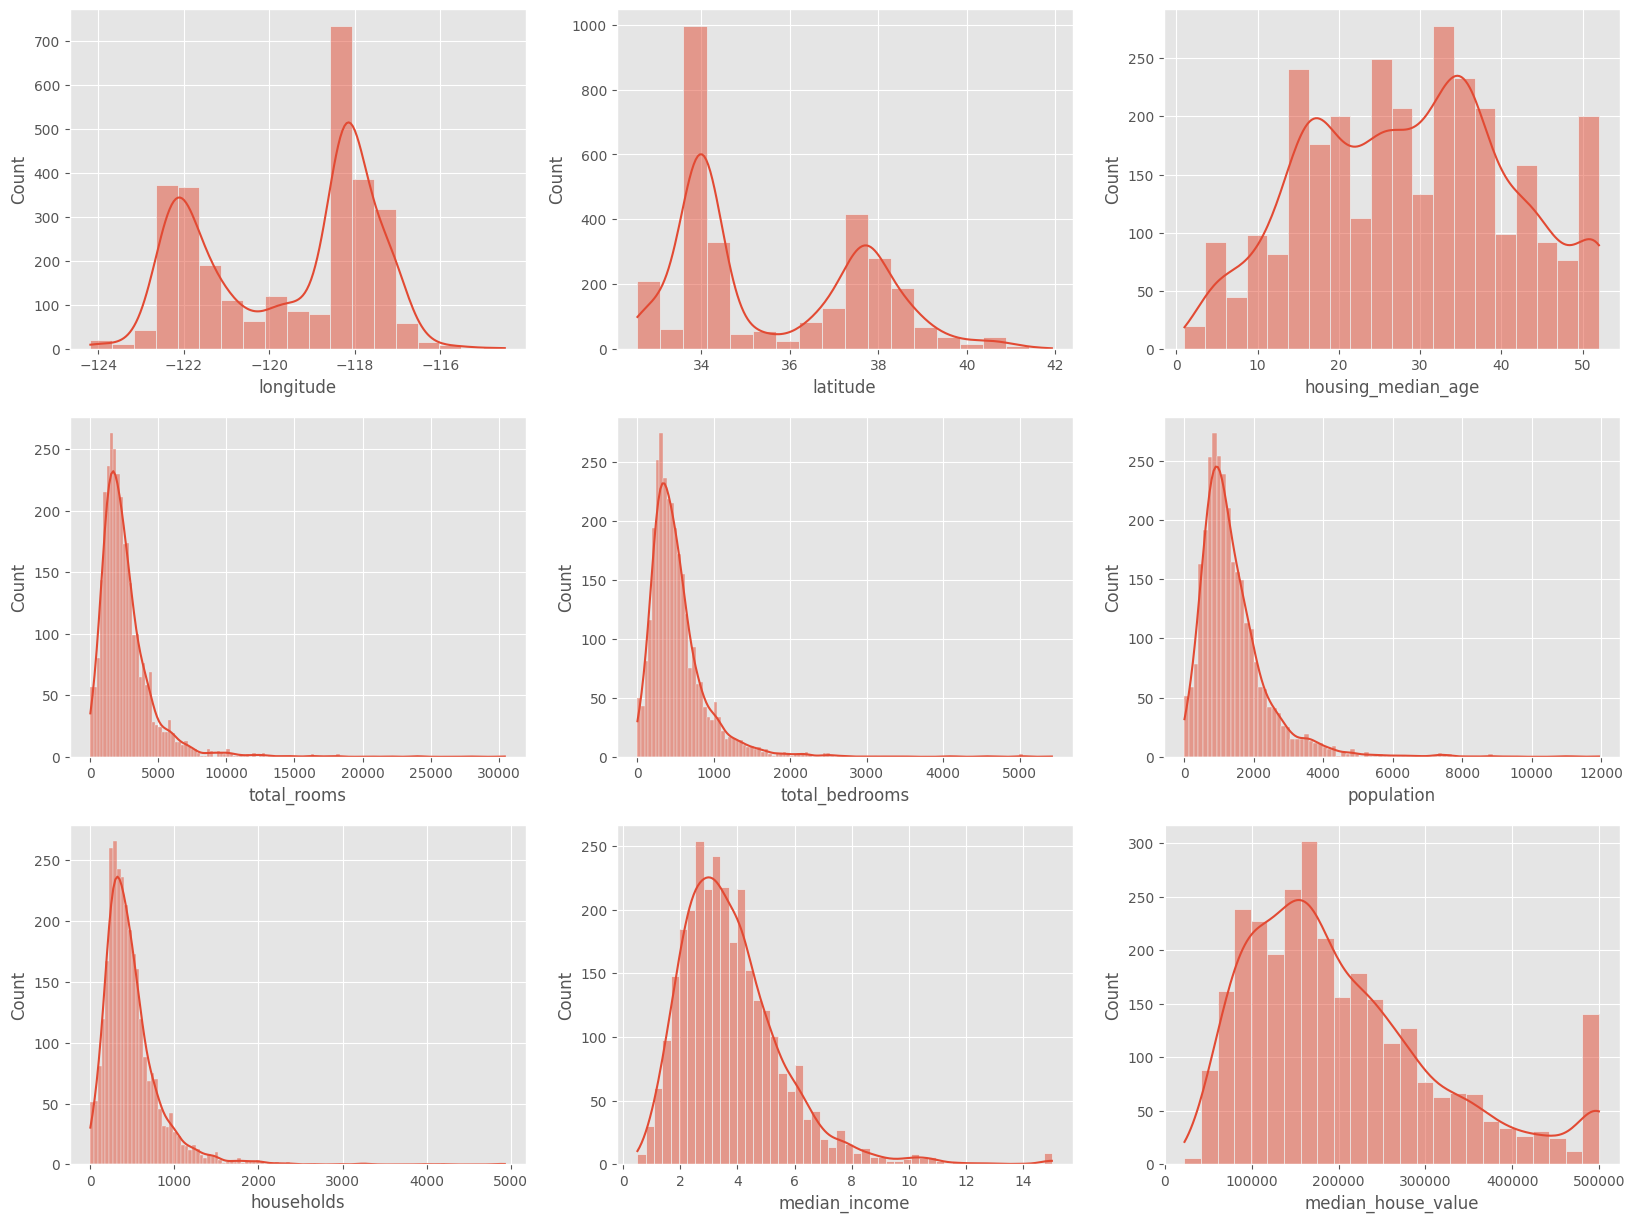

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(20,15))
i = 1
for col in df.columns:
  plt.subplot(3,3,i)
  sns.histplot(data=df,x=col,kde=True)
  i+=1

- ***As we seen that most of the data is skewed now lets see the outliers***

In [ ]:
def box_hist_plot(data,col,bins="auto"):
  fig,axs = plt.subplots(ncols=2,figsize=(11,3))

  sns.histplot(data=data,x=col,bins=bins,ax=axs[0],kde=True)
  sns.boxplot(data=data,x=col,ax=axs[1])

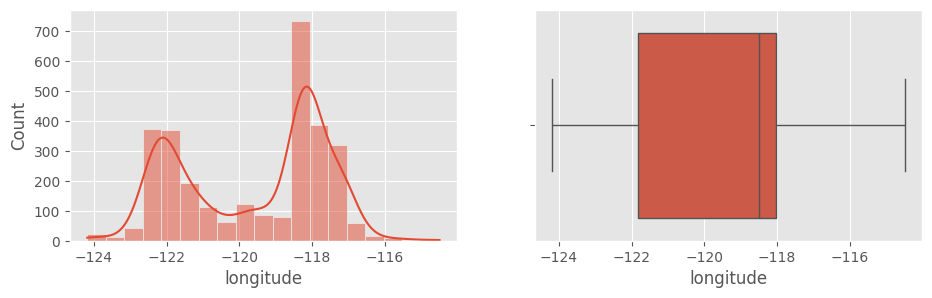

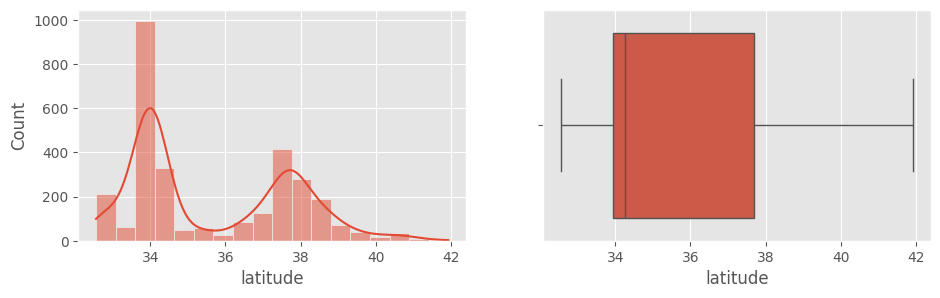

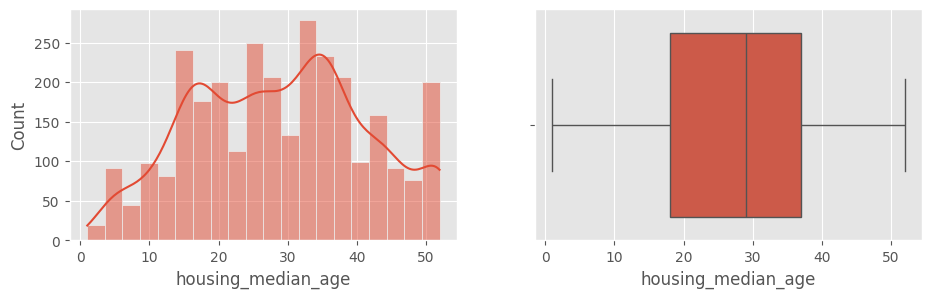

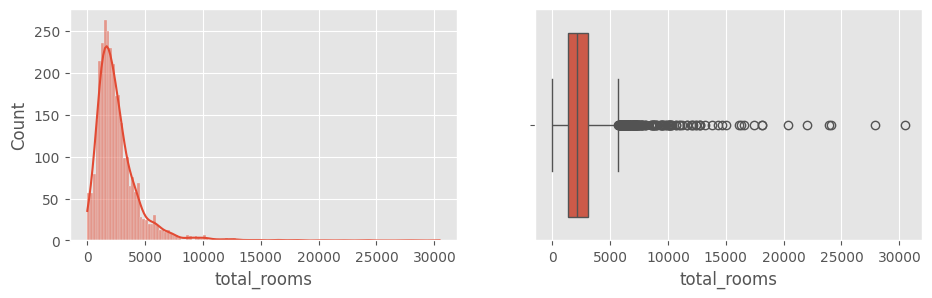

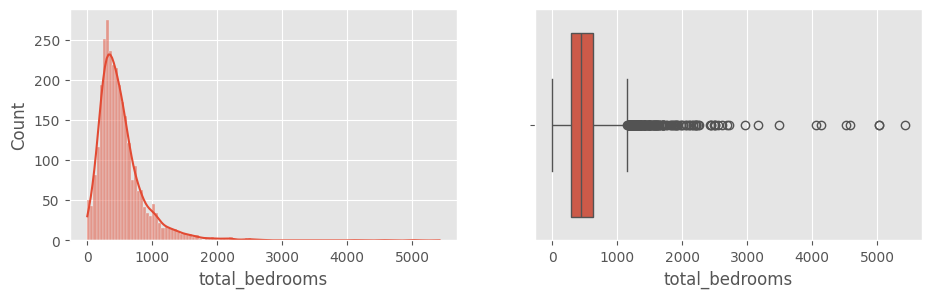

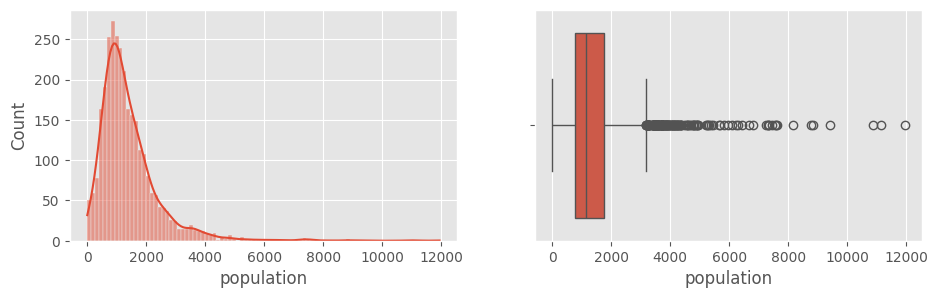

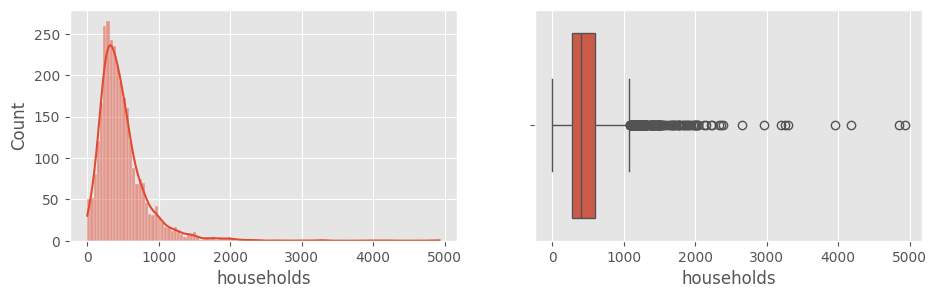

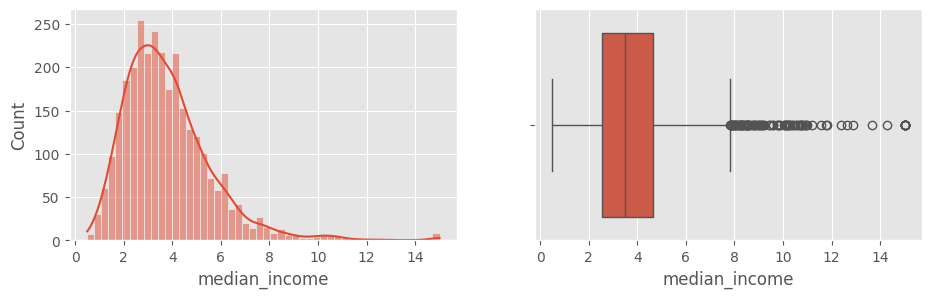

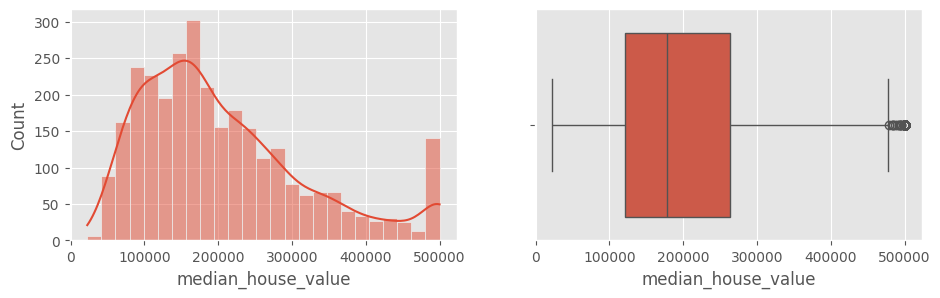

In [ ]:
for col in df.columns:
  box_hist_plot(df,col)

- ***Most of outlies we have..***
- ***To handle them we need to trim them or as we skwed data so we can use IQR method:***

In [ ]:
# we have so many outliers:
df1 = df.copy()

In [ ]:
# lets do capping:
for i in df.drop(columns=['longitude','latitude','housing_median_age']).columns:
  Q1 = np.quantile(df[i],0.25)
  Q3 = np.quantile(df[i],0.75)

  IQR = Q3-Q1

  upper_limit = Q3+1.5*IQR
  lower_limit = Q1-1.5*IQR
  print(f"upper limit for {i} is :{upper_limit}")

upper limit for total_rooms is :5721.0
upper limit for total_bedrooms is :1153.5
upper limit for population is :3186.875
upper limit for households is :1083.625
upper limit for median_income is :7.825187499999999
upper limit for median_house_value is :478137.5


In [ ]:
# lets remove those outliers which are above the upper limit:
for i in df1.drop(columns=['longitude','latitude','housing_median_age']).columns:
  Q1 = np.quantile(df1[i],0.25)
  Q3 = np.quantile(df1[i],0.75)

  IQR = Q3-Q1

  upper_limit = Q3+1.5*IQR
  df1[i] = np.where(df1[i]> upper_limit,upper_limit,df[i])

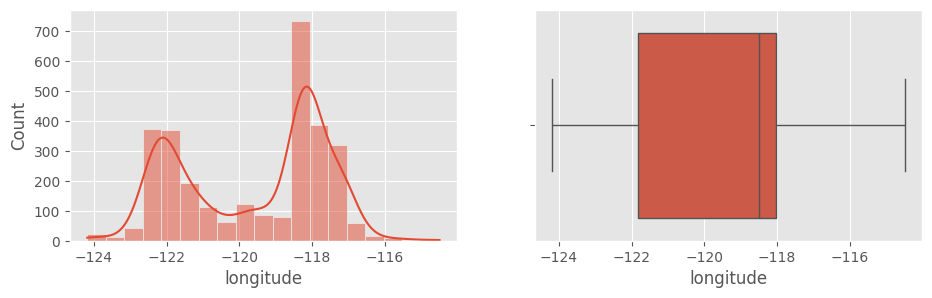

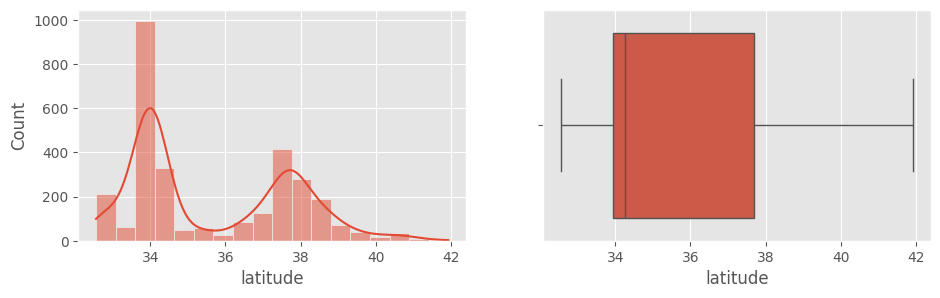

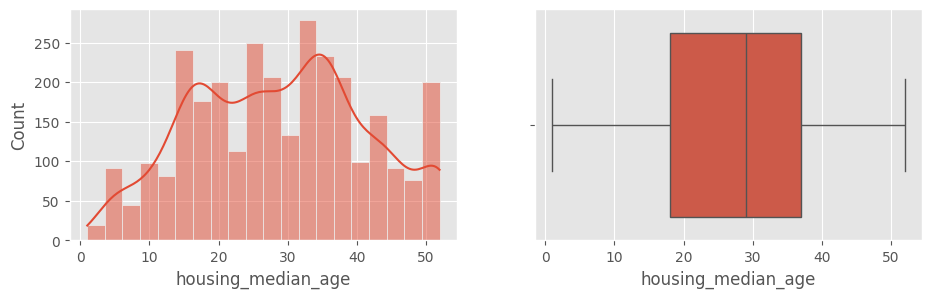

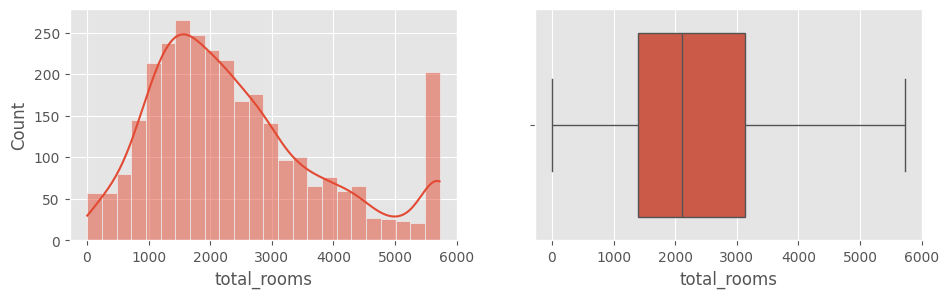

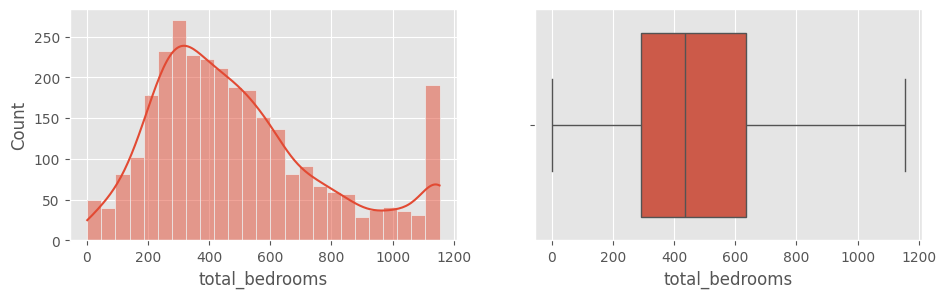

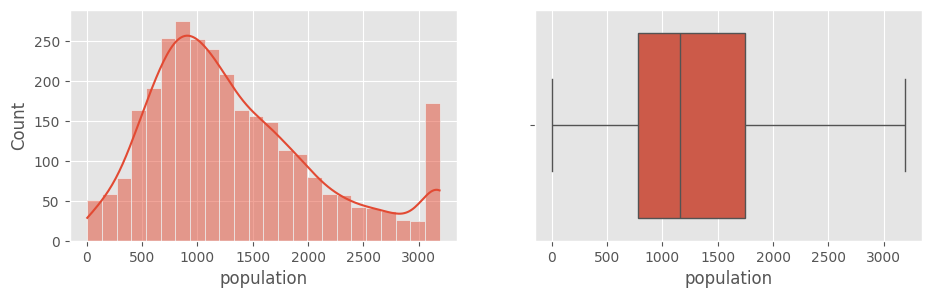

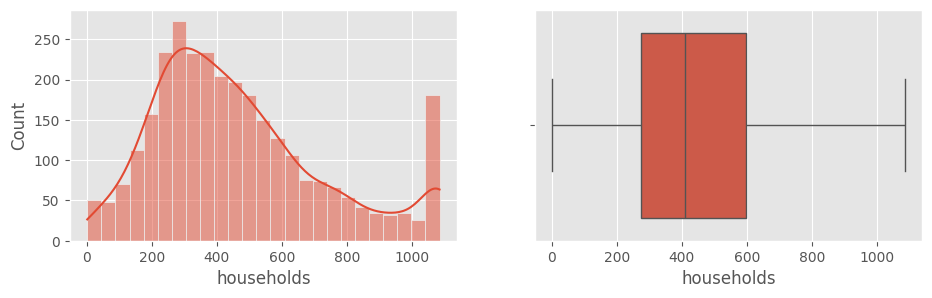

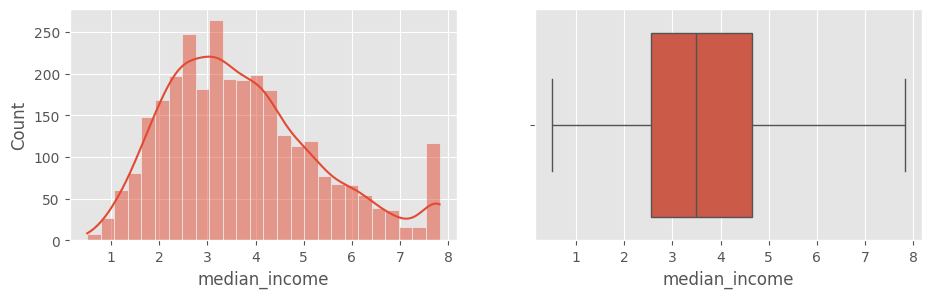

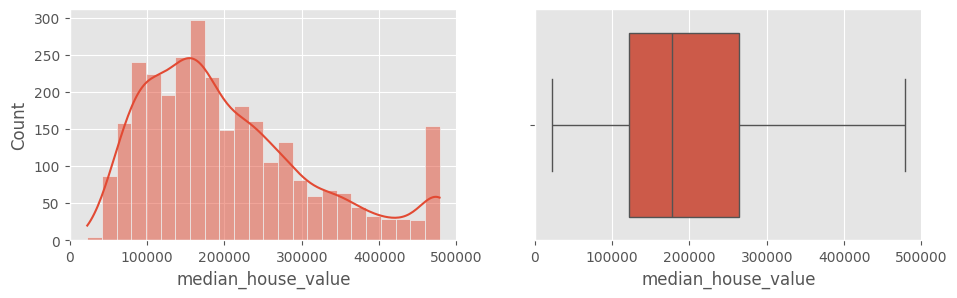

In [ ]:
for col in df1.columns:
  box_hist_plot(df1,col)

Text(0.5, 1.0, 'Correlation plot\n')

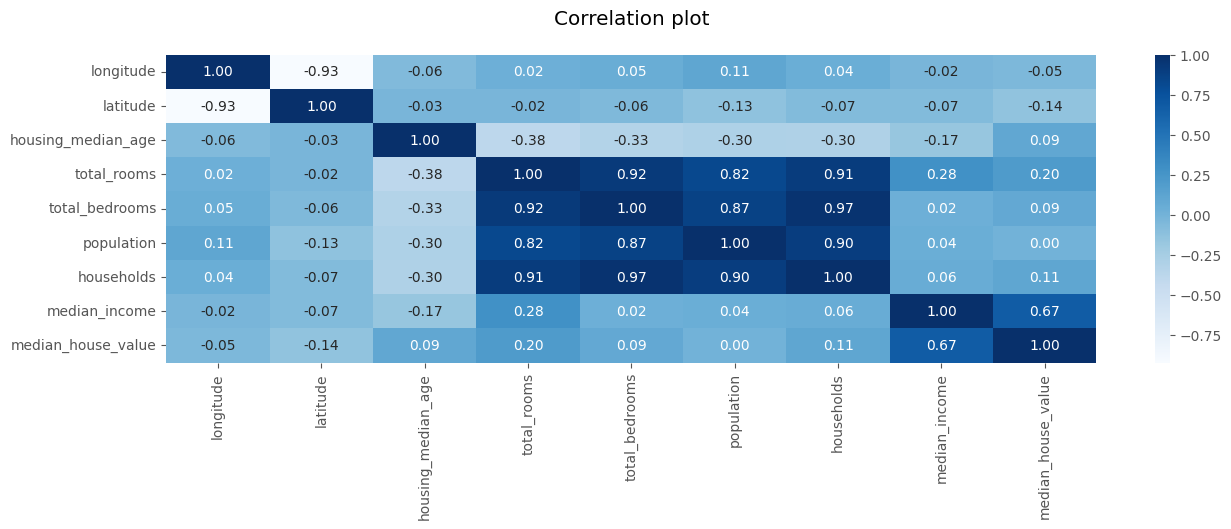

In [ ]:
plt.figure(figsize=(15,4))
sns.heatmap(data=df1.corr(),annot=True,fmt=".2f",cmap="Blues")
plt.title("Correlation plot\n")

- *lets see the distribution of data points..*

In [ ]:
sns.pairplot(data=df1)

Output hidden; open in https://colab.research.google.com to view.

- ***We have multiple columns which are highly correlated to each other...***
- ***To avoid multicollinearity we reqired domain knowledge  so we can use to select the relevent featuers or we can use faetuer selection techniques..***
- ***Now it may lead towards the multicollinearity and to avoid this we can do fearure enginnering or we need to drop the columns...***

### ***Feature Selection Techniques:***
- ***For Numerical input and Numerical Output we can use Recursive feature elimintion...***

### ***PCA -->(Principal Component Analysis):***
- PCA helps to convert the dataset to new set with uncorrelated features..
- It reduce the multi-collineairty issue....

In [ ]:
# lets import the libraries:

# Data splitting:
from sklearn.model_selection import train_test_split

# Modeding:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor


# featuer sacling:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# feature selection
from sklearn.feature_selection import RFE

# for dimensionality reduction means same feature selection:
from sklearn.decomposition import PCA

# for hyperparamtere tuning and model evaluation
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

# for pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# for peformance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# *splits the data:*

In [ ]:
X = df1.iloc[:,:-1]
X[:2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990


In [ ]:
y = df1.median_house_value
y[:2]

0    344700.0
1    176500.0
Name: median_house_value, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### ***Cross_val:***
- In this cross validation technique the data would be divided into folds or subfolds..
- Default 5 folds occurs..and it performs iteration 5 times...and each time testing data will be changed and trained the model...
- This will helps to reduce the high variancness over unseen data...

# *Lets apply MinMaxScaler:*
- *For Regression problem we use min max scaler...*
- ***Feature Scaling is used to avoid the dominance effect of larger values over samller value and this will helps to imporve the model performance...***

# *fit:*
- *it used to calculate the Parameters*
- *Now we are using the feature scaling technique and so fit method calcualtes the min and max value of each feature..*


# *Transform:*
- *it is used apply the calcualted paramtere over each data..*
- *So transform supply the formula of mmin max scaler over each value of datatset and we get the sacled value within rage 0-1...*

- ***Once we apply fit so another time we can use only transform beacuse it learns the paramteres...***

In [ ]:
mm = MinMaxScaler()

In [ ]:
x_train_scaled = mm.fit_transform(x_train)
x_test_scaled = mm.transform(x_test)

In [ ]:
# we get the array after scaling...
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_train_scaled[:2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.604339,0.163462,0.529412,0.379178,0.709509,0.799214,0.703571,0.188266
1,0.589876,0.172009,0.450980,0.491339,0.584455,0.458220,0.571363,0.503407


In [ ]:
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_test_scaled[:2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.257231,0.573718,0.843137,0.176378,0.193660,0.219682,0.218190,0.157741
1,0.711777,0.181624,0.333333,0.680490,0.596613,0.339737,0.344851,0.391425


# *lets create the function which will help to get the multple models performance at once..*

In [ ]:
def Model_Eval(x_train_scaled,y_train,x_test_scaled,y_test):

  classifiers = [
      LinearRegression(),
      DecisionTreeRegressor(),
      DecisionTreeRegressor(max_depth=5),
      DecisionTreeRegressor(max_depth=7),
      DecisionTreeRegressor(max_depth=9),
      SVR(kernel="linear"),
      SVR(kernel="rbf"),
      SVR(kernel="poly"),
      RandomForestRegressor(),
      KNeighborsRegressor(),
      KNeighborsRegressor(n_neighbors=7,weights="distance"),
      KNeighborsRegressor(n_neighbors=9),
      KNeighborsRegressor(n_neighbors=11),
      GradientBoostingRegressor()
  ]

  class_names=[
      "LR",
      "DecReg",
      "DecReg5",
      "DecReg7",
      "DecReg9",
      "SVR1",
      "SVRrbf",
      "SVRpoly",
      "RandomReg",
      "KNN",
      "KNN7",
      "KNN9",
      "KNN11",
      "GradBoostReg"
  ]

  Metrics = pd.DataFrame(columns=['mean_sq_error','mean_abs_error','r2_score'])

  for i,clf in enumerate(classifiers):
    # now fit the data
    clf.fit(x_train_scaled,y_train)

    # pred:
    y_pred = clf.predict(x_test_scaled)

    # metrics:

    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)

    Metrics.loc[class_names[i],"mean_sq_error"] = mse
    Metrics.loc[class_names[i],"mean_abs_error"] = mae
    Metrics.loc[class_names[i],"r2_score"] = r2

  Metrics = Metrics.sort_values(by="r2_score",ascending=False)

  return Metrics

Metrics = Model_Eval(x_train_scaled,y_train,x_test_scaled,y_test)

In [ ]:
Metrics

,mean_sq_error,mean_abs_error,r2_score
GradBoostReg,3298940216.038581,40176.000781,0.726849
RandomReg,3375675829.819323,39517.221667,0.720495
LR,4186344970.226976,48682.277051,0.653372
KNN7,4216232694.477663,46428.746303,0.650898
KNN,4374652785.510417,47728.754167,0.63778
KNN11,4401785779.814479,47325.225379,0.635534
KNN9,4407633246.891076,47467.571759,0.63505
DecReg7,5178807992.170306,50785.345988,0.571197
DecReg5,5427005154.378732,53880.732286,0.550646
DecReg9,5979938795.135786,51864.853125,0.504863


# ***lets do hyper parameter tuning over boosting algorithms:***

In [ ]:
params = {
    "learning_rate":[0.1,0.01,0.001],
    "n_estimators":[100,300,500],
    "max_depth":[3,5,7]
}

grid = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=params)

grid.fit(x_train_scaled,y_train)

y_pred = grid.predict(x_test_scaled)

print(f'mean squared error {mean_squared_error(y_test,y_pred)}')
print(f'mean absolute error {mean_absolute_error(y_test,y_pred)}')
print(f'r2 score {r2_score(y_test,y_pred)*100}')
print(f"best parameter {grid.best_params_}")

mean squared error 3080850586.9164243
mean absolute error 37569.75777371089
r2 score 74.4906785902454
best parameter {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [ ]:
params = {
    "learning_rate":[0.1,0.01,0.001],
    "n_estimators":[300,500,700],
    "max_depth":[3,5,7]
}

gridxgbr = GridSearchCV(estimator=XGBRegressor(),param_grid=params)

gridxgbr.fit(x_train_scaled,y_train)

y_pred = gridxgbr.predict(x_test_scaled)

print(f'mean squared error {mean_squared_error(y_test,y_pred)}')
print(f'mean absolute error {mean_absolute_error(y_test,y_pred)}')
print(f'r2 score {r2_score(y_test,y_pred)*100}')
print(f"best parameter {grid.best_params_}")

mean squared error 2865415100.9120083
mean absolute error 36671.095065104164
r2 score 76.27447592170049
best parameter {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


# ***We evaluate our model without removing correlated features and without using feature selection techniques...***

# Now we have to do feature engineering and some faeture we need to remove to avoid multicollinaeirty issue or we can use PCA...

#***Feature Engineering:***

- ***We can calculate the ratio of two features which is rooms and bedrooms and make it as bedrooms per room...***
- ***It will indiactes that suppose we get the value like 0.17 so it shows that out of 100 rooms 17% are bedrooms...***

In [ ]:
df1['bedrooms_per_rooms'] = df1['total_bedrooms']/df1['total_rooms']

- ***House hold --> group of people living together***
- ***if we cal ratio of total rooms by households as householsize then it will indicates On average how many people living in that house..***
- ***if result is higher number then it tends to more people living together if it lower then it tends to have fewer people..***

In [ ]:
df1['households_size'] = df1['total_rooms']/df['households']

#Removing the features after featuer engineering

In [ ]:
df2 = df1.copy()

In [ ]:
df2.drop(columns=['total_rooms','total_bedrooms','households'],inplace=True)

Text(0.5, 1.0, 'Correlation Plot After Feature Engineering\n')

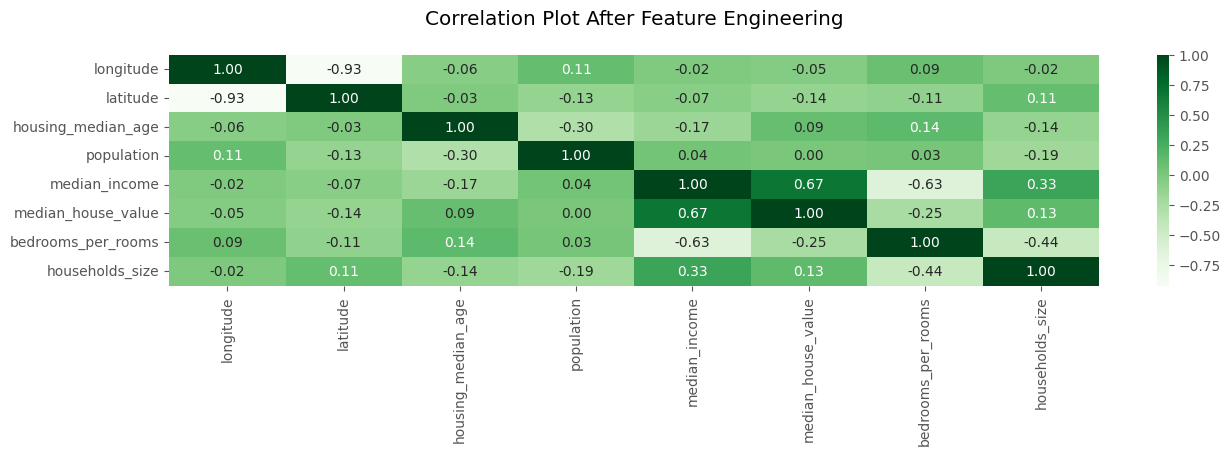

In [ ]:
plt.figure(figsize=(15,3))
sns.heatmap(data=df2.corr(),annot=True,fmt=".2f",cmap="Greens")
plt.title("Correlation Plot After Feature Engineering\n")

In [ ]:
df2 = df2[['longitude','latitude','housing_median_age','population','median_income','bedrooms_per_rooms','households_size','median_house_value']]

#Now lets build the model and predicts the result as we know the best parameters for XGBRegressor lets use them..

In [ ]:
x1_train,x1_test,y1_train,y1_test = train_test_split(df2.iloc[:,:-1],df.iloc[:,-1],test_size=0.3,random_state=42)

In [ ]:
# lets scale the data:
x1_train_scaled = mm.fit_transform(x1_train)
x1_test_scaled = mm.transform(x1_test)

In [ ]:
# lets make it dataframe:
x1_train_scaled = pd.DataFrame(x1_train_scaled,columns=x1_train.columns)
x1_test_scaled = pd.DataFrame(x1_train_scaled,columns=x1_train.columns)

In [ ]:
# as we have the function model evalution lets use it:
print(f"After Featuer engineering models score:\n{Model_Eval(x1_train,y1_train,x1_test,y1_test)}")

After Featuer engineering models score:
                   mean_sq_error mean_abs_error  r2_score
GradBoostReg   4030419637.464057   43151.400041   0.68059
RandomReg      4555174629.097061   46227.329289  0.639004
LR             5304758264.374475      52434.292  0.579599
DecReg5        6779218102.757118   58227.436438  0.462749
DecReg7        6785861535.169978   56835.622138  0.462222
DecReg9        7886657559.041552   59582.271826  0.374984
DecReg         9211937491.389999   63728.834444  0.269956
SVR1          12609905939.167183     83310.9091  0.000668
SVRpoly       13238224256.211552    85423.93822 -0.049126
SVRrbf        13247196457.902063   85409.280121 -0.049837
KNN11          13305890818.27282   90909.076364 -0.054488
KNN9          13505415614.223511   91124.861975 -0.070301
KNN7          13774953748.954779   91545.735162 -0.091661
KNN           14506115447.932978   93283.160889 -0.149606


#lets use pca
- ***It gives the new data with uncorrelated feature which help to reduce the multicollinearity issue..***
- it comes under unsupevised ML algorithmm..
- In this pcas we need to defne the n_components --> means number of fatuers we wants to keep...

In [ ]:
pca = PCA(n_components=8)

In [ ]:
df1.drop(columns=['bedrooms_per_rooms','households_size'],inplace=True)

In [ ]:
x2_train,x2_test,y2_train,y2_test = train_test_split(df1.iloc[:,:-1],df1.iloc[:,-1],test_size=0.3,random_state=42)

In [ ]:
# sacle the data...
x2_train_scaled = mm.fit_transform(x2_train)
x2_test_scaled = mm.transform(x2_test)

In [ ]:
# now lets apply pca:
x2_train_scaled_pca = pca.fit_transform(x2_train_scaled)
x2_test_scaled_pca = pca.transform(x2_test_scaled)

In [ ]:
# now lwts make it dataframe and chcek the correlations now...
X2_train = pd.DataFrame(x2_train_scaled_pca,columns=x2_train.columns)
X2_test = pd.DataFrame(x2_test_scaled_pca,columns=x2_test.columns)

Text(0.5, 1.0, 'Correation plot AFter using PCA')

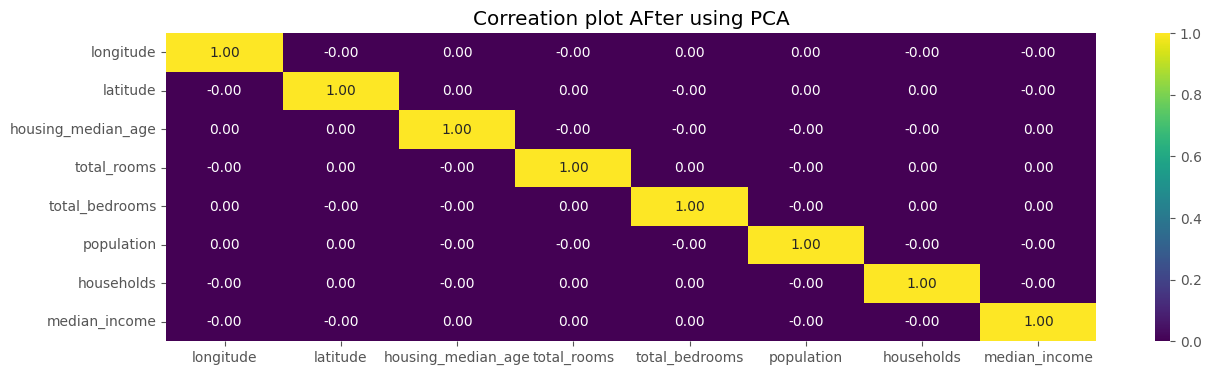

In [ ]:
plt.figure(figsize=(15,4))
sns.heatmap(data=X2_train.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.title("Correation plot AFter using PCA")

In [ ]:
# Now lets see the performance of models...
print(f"After using PCA model performance:\n{Model_Eval(X2_train,y2_train,X2_test,y2_test)}")

After using PCA model performance:
                   mean_sq_error mean_abs_error  r2_score
RandomReg      3836707424.603854     42203.3925  0.684025
GradBoostReg   3887841918.397781   43494.025711  0.679814
LR             4523855495.842294   48741.727605  0.627435
KNN7           4737275581.302756   48172.597318  0.609859
KNN11          4832529759.537132   48518.791667  0.602014
KNN9           4871924145.563272    48883.12963   0.59877
KNN            4956377188.020833   49261.847222  0.591814
DecReg5        5149464451.177028   51708.022966  0.575913
DecReg7        5346287335.184595   51004.989604  0.559703
DecReg9        6214590767.259106   53509.518677  0.488193
DecReg         7246243959.201389   58983.430556  0.403231
SVRpoly       12704960744.981541   84478.638163 -0.046325
SVR1          12721486716.224062   84535.730761 -0.047686
SVRrbf        12722773311.998549   84537.416801 -0.047792


- ***Still not getting the better results so now we have to do feature Selection over original data...***
- ***As we know for numeric input and numeric output we use Recursive feature Elimination....***
- Which gives boolean output..
- WE have to specify n_featuer to select and if does not given then default it selects 50% features...

In [ ]:
x2_train_scaled = pd.DataFrame(x2_train_scaled,columns=x2_train.columns)
x2_test_scaled = pd.DataFrame(x2_test_scaled,columns=x2_test.columns)

In [ ]:
x2_train_scaled.shape

(2100, 8)

In [ ]:
y2_train.shape

(2100,)

In [ ]:
def Model_Eval_RFE(x2_train_scaled,y2_train,x2_test_scaled,y2_test):

  classifiers = [
      LinearRegression(),
      DecisionTreeRegressor(),
      DecisionTreeRegressor(max_depth=5),
      DecisionTreeRegressor(max_depth=7),
      DecisionTreeRegressor(max_depth=9),
      RandomForestRegressor(),
      GradientBoostingRegressor()
  ]

  class_names=[
      "LR",
      "DecReg",
      "DecReg5",
      "DecReg7",
      "DecReg9",
      "RandomReg",
      "GradBoostReg"
  ]

  metrics = pd.DataFrame(columns=['mean_sq_error','mean_abs_error','r2_score'])

  for i,clf in enumerate(classifiers):
    # lets use recursive feature elimination
    rfe = RFE(estimator=clf)

    rfe.fit_transform(x2_train_scaled,y2_train)

    out = rfe.support_

    x2_train_scaled.loc[:,out]

    rfe.fit_transform(x2_test_scaled,y2_test)

    out1 = rfe.support_

    x2_test_scaled.loc[:,out1]

    # now fit the data
    clf.fit(x2_train_scaled,y2_train)

    # pred:
    y2_pred = clf.predict(x2_test_scaled)

    # metrics:

    mse = mean_squared_error(y2_test,y2_pred)
    mae = mean_absolute_error(y2_test,y2_pred)
    r2 = r2_score(y2_test,y2_pred)

    Metrics.loc[class_names[i],"mean_sq_error"] = mse
    Metrics.loc[class_names[i],"mean_abs_error"] = mae
    Metrics.loc[class_names[i],"r2_score"] = r2

  metrics = metrics.sort_values(by="r2_score",ascending=False)

  return metrics

metrics = Model_Eval(x2_train_scaled,y2_train,x2_test_scaled,y2_test)

In [ ]:
metrics

,mean_sq_error,mean_abs_error,r2_score
GradBoostReg,3602176295.208229,40676.805298,0.70334
RandomReg,3757808906.852622,41616.876806,0.690523
LR,4523855495.842294,48741.727605,0.627435
KNN7,4737275581.302755,48172.597318,0.609859
KNN11,4832529759.537132,48518.791667,0.602014
KNN9,4871924145.563272,48883.12963,0.59877
KNN,4956377188.020833,49261.847222,0.591814
DecReg7,5665080372.150267,52441.849115,0.533449
DecReg5,6048811635.593692,55286.863402,0.501846
DecReg9,6103570621.815482,52201.472355,0.497337


## As compare to the previous models after using the featuer selection performance is same so lets do hyperparameter tuning to get the better results...
- *Previous model highet result is of XGBRegressor --> 76%*

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

params = {
    "learning_rate": [0.1, 0.01, 0.001],
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7]
}

# Perform grid search to find the best hyperparameters for GradientBoostingRegressor
grid = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=params)
grid.fit(x2_train_scaled, y2_train)

# Get the best estimator from grid search
best_estimator = grid.best_estimator_

# Perform feature selection using RFE with the best estimator
rfe = RFE(estimator=best_estimator)
rfe.fit(x2_train_scaled, y2_train)

# Get selected features
selected_features = rfe.support_

# Transform the training and test data
x2_train_selected = x2_train_scaled.loc[:, selected_features]
x2_test_selected = x2_test_scaled.loc[:, selected_features]

# Fit the model on selected features
best_estimator.fit(x2_train_selected, y2_train)

# Make predictions
y2_pred = best_estimator.predict(x2_test_selected)

# Calculate metrics
mse = mean_squared_error(y2_test, y2_pred)
mae = mean_absolute_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)

print(f'mean squared error: {mse}')
print(f'mean absolute error: {mae}')
print(f'r2 score: {r2}')
print(f'best parameters: {grid.best_params_}')

mean squared error: 3471454440.633735
mean absolute error: 39454.90555224695
r2 score: 0.7141061433158635
best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [ ]:
params = {
    "learning_rate": [0.1, 0.01, 0.001],
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7]
}

# Perform grid search to find the best hyperparameters for GradientBoostingRegressor
grid = GridSearchCV(estimator=XGBRegressor(), param_grid=params)
grid.fit(x2_train_scaled, y2_train)

# Get the best estimator from grid search
best_estimator = grid.best_estimator_

# Perform feature selection using RFE with the best estimator
rfe = RFE(estimator=best_estimator)
rfe.fit(x2_train_scaled, y2_train)

# Get selected features
selected_features = rfe.support_

# Transform the training and test data
x2_train_selected = x2_train_scaled.loc[:, selected_features]
x2_test_selected = x2_test_scaled.loc[:, selected_features]

# Fit the model on selected features
best_estimator.fit(x2_train_selected, y2_train)

# Make predictions
y2_pred = best_estimator.predict(x2_test_selected)

# Calculate metrics
mse = mean_squared_error(y2_test, y2_pred)
mae = mean_absolute_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)

print(f'mean squared error: {mse}')
print(f'mean absolute error: {mae}')
print(f'r2 score: {r2}')
print(f'best parameters: {grid.best_params_}')

mean squared error: 3458276215.1915545
mean absolute error: 39609.727710503474
r2 score: 0.715191444523282
best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


# lets build the pipeline...without using feature selection....

### *Lets split the data*

In [ ]:
X[:2],y[:2]

(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.05     37.37                27.0       3885.0           661.0   
 1    -118.30     34.26                43.0       1510.0           310.0   
 
    population  households  median_income  
 0      1537.0       606.0         6.6085  
 1       809.0       277.0         3.5990  ,
 0    344700.0
 1    176500.0
 Name: median_house_value, dtype: float64)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape[1]

8

In [ ]:
trf1 = ColumnTransformer([
    ("MinMax",MinMaxScaler(),slice(0,8)),
],remainder="passthrough")

In [ ]:
trf2 = XGBRegressor(learning_rate=0.1,max_depth=3,n_estimators=500)

In [ ]:
cvs = cross_val_score(trf2,x_train,y_train,cv=10)

In [ ]:
cvs.mean()*100

76.95010617416577

In [ ]:
xgbreg_pipe = make_pipeline(trf1,trf2)

In [ ]:
xgbreg_pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('MinMax', MinMaxScaler(),
                                                  slice(0, 8, None))])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_met...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
from sklearn import set_config

set_config(display="diagram")

- set config used to access the how column transformers converts the values...

In [ ]:
xgbreg_pipe.named_steps['columntransformer'].transformers_[0][1].scale_

array([0.10330579, 0.10683761, 0.01960784, 0.00017498, 0.00086843,
       0.00031428, 0.00092453, 0.13651341])

In [ ]:
y_pred = xgbreg_pipe.predict(x_test)
y_pred[:2]

array([ 96085.484, 159465.11 ], dtype=float32)

In [ ]:
y_test[:2]

1801    119400.0
1190    133600.0
Name: median_house_value, dtype: float64

In [ ]:
mean_squared_error(y_test,y_pred)

3150923784.7317667

In [ ]:
r2_score(y_test,y_pred)*100

74.05036510373189

### ***Now lets use the Neural Networks...***

In [ ]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
# lets create object
model = Sequential()
model

In [ ]:
# add the layers
model.add(Dense(15,activation="relu",input_dim=8)) # hidden layer1
model.add(Dropout(0.30))
model.add(Dense(10,activation="relu")) # hidden layer2
model.add(Dropout(0.30))
model.add(Dense(8,activation="relu")) # hidden layer3
model.add(Dropout(0.30))
model.add(Dense(5,activation="relu")) # hidden layer4
model.add(Dropout(0.30))
model.add (Dense(1,activation='linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                135       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 5)                 4

In [ ]:
# compile:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [ ]:
# sacle the values:
x_train_scaled = mm.fit_transform(x_train)
x_test_scaled = mm.transform(x_test)

In [ ]:
history = model.fit(x_train_scaled,y_train,epochs=1000,validation_split=0.2) # valiodatin split helps to give the training acuracy and testing accuracy..

Epoch 1/1000
53/53 [==============================] - 2s 8ms/step - loss: 54876823552.0000 - mae: 206180.3438 - val_loss: 53453103104.0000 - val_mae: 203894.9219
Epoch 2/1000
53/53 [==============================] - 0s 4ms/step - loss: 54874259456.0000 - mae: 206174.2812 - val_loss: 53448224768.0000 - val_mae: 203883.2188
Epoch 3/1000
53/53 [==============================] - 0s 3ms/step - loss: 54864187392.0000 - mae: 206150.1562 - val_loss: 53430022144.0000 - val_mae: 203839.6250
Epoch 4/1000
53/53 [==============================] - 0s 3ms/step - loss: 54827941888.0000 - mae: 206064.3750 - val_loss: 53369978880.0000 - val_mae: 203695.5625
Epoch 5/1000
53/53 [==============================] - 0s 3ms/step - loss: 54721761280.0000 - mae: 205811.6875 - val_loss: 53197467648.0000 - val_mae: 203281.2031
Epoch 6/1000
53/53 [==============================] - 0s 3ms/step - loss: 54420680704.0000 - mae: 205116.4219 - val_loss: 52763516928.0000 - val_mae: 202234.8594
Epoch 7/1000
53/53 [========

In [ ]:
y_pred = model.predict(x_test_scaled)
y_pred = y_pred.flatten() # used to convert 1d array

29/29 [==============================] - 0s 2ms/step


In [ ]:
y_test

1801    119400.0
1190    133600.0
1817    173600.0
251     218600.0
2505    276700.0
          ...   
2443    212800.0
856     242400.0
1983    134100.0
166     289600.0
59      194300.0
Name: median_house_value, Length: 900, dtype: float64

In [ ]:
error = y_test - y_pred
error

1801     23405.328125
1190     18587.507812
1817      9498.562500
251      70218.187500
2505    143434.281250
            ...      
2443     62663.140625
856      62202.171875
1983     38109.484375
166      12933.875000
59       58310.937500
Name: median_house_value, Length: 900, dtype: float64

In [ ]:
error_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred,"Error":error})
error_df

,Actual,Predicted,Error
1801,119400.0,95994.671875,23405.328125
1190,133600.0,115012.492188,18587.507812
1817,173600.0,164101.437500,9498.562500
251,218600.0,148381.812500,70218.187500
2505,276700.0,133265.718750,143434.281250
...,...,...,...
2443,212800.0,150136.859375,62663.140625
856,242400.0,180197.828125,62202.171875
1983,134100.0,95990.515625,38109.484375
166,289600.0,276666.125000,12933.875000


In [ ]:
# lets see the val_mae and mse...
history.history

{'loss': [54876823552.0,
  54874259456.0,
  54864187392.0,
  54827941888.0,
  54721761280.0,
  54420680704.0,
  53749694464.0,
  52481290240.0,
  50216607744.0,
  46408859648.0,
  41455661056.0,
  35744309248.0,
  30024355840.0,
  25124499456.0,
  22720964608.0,
  22061735936.0,
  22078234624.0,
  22591494144.0,
  22861942784.0,
  23077797888.0,
  21280174080.0,
  22269145088.0,
  21817866240.0,
  21634207744.0,
  21808297984.0,
  21555771392.0,
  20950411264.0,
  21888765952.0,
  22351157248.0,
  21212614656.0,
  21172334592.0,
  20835706880.0,
  21641881600.0,
  21064624128.0,
  20773232640.0,
  20879970304.0,
  19871041536.0,
  20705245184.0,
  21932623872.0,
  21423198208.0,
  21313497088.0,
  20693708800.0,
  20864354304.0,
  20884799488.0,
  21637842944.0,
  20287328256.0,
  20037148672.0,
  21765292032.0,
  21090488320.0,
  20189796352.0,
  20689975296.0,
  19618924544.0,
  20623761408.0,
  21518929920.0,
  20421269504.0,
  20858466304.0,
  20570025984.0,
  19929909248.0,
  2129

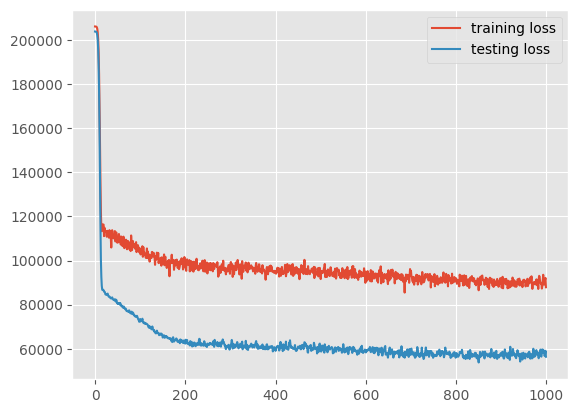

In [ ]:
plt.plot(history.history['mae'],label='training loss')
plt.plot(history.history['val_mae'],label='testing loss')
plt.legend()

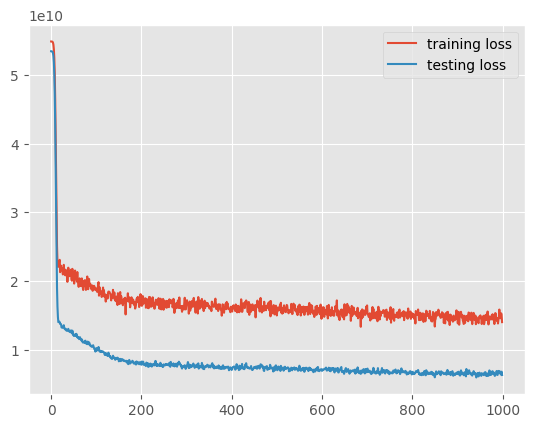

In [ ]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='testing loss')
plt.legend()

In [ ]:
_, mae = model.evaluate(x_test_scaled, y_test)
print("Test MAE:", mae)

29/29 [==============================] - 0s 2ms/step - loss: 6241862656.0000 - mae: 55364.3828
Test MAE: 55364.3828125


In [ ]:
r2_score(y_test,y_pred)*100

48.59473691073761

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

#lets dump the model and the data....

In [ ]:
df1.to_csv("california_housing_data2.csv")

In [ ]:
import pickle

pickle.dump(df1,open("df1_cal_housing.pkl","wb"))

In [ ]:
pickle.dump(xgbreg_pipe,open("xgbreg_cal_housing_pipe.pkl","wb"))

In [ ]:
test2 = df[['total_bedrooms']]
test2[:2]

,total_bedrooms
0,661.0
1,310.0


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(test2,y)

LinearRegression()

In [ ]:
pred = model.predict(test2)
pred[:2]

array([207774.85374406, 199972.48649307])

Text(0.5, 1.0, 'Linear Regression Chart\n')

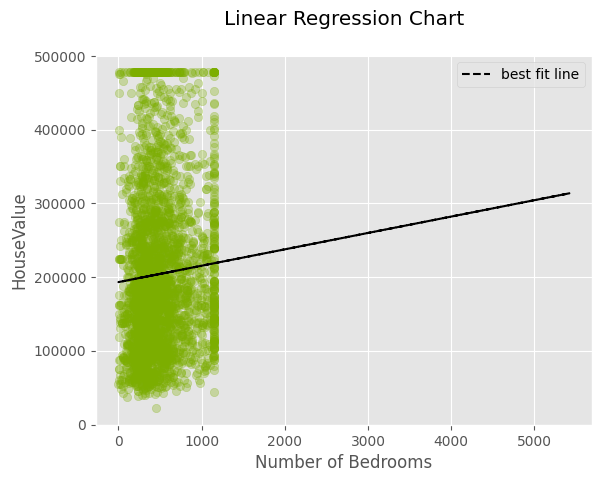

In [ ]:
plt.plot(test2,pred,c="k",ls="--",label="best fit line")
plt.legend()
plt.scatter(x=df1.total_bedrooms,y=df1.median_house_value,c="#7CAE00",alpha=0.3)
plt.xlabel("Number of Bedrooms")
plt.ylabel("HouseValue")
plt.title("Linear Regression Chart\n")

In [ ]:
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
